# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### **Data exploration, cleaning**

In [8]:

# Create a profile report to gain insights into the structure, content, and quality of our data
import ydata_profiling

# Create a profile report
profile = ydata_profiling.ProfileReport(df)

# Print the profile report
profile.to_file("Pre-EDA.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Initial insights - profile_report

* Internet's been the most used sales channel to booking.
* The trip_type column is highly imbalanced (94.4%)
* All numeric columns have standard deviations ("std") other than zero, indicating that they do not have a single value.
* We note that there is a very small percentage of duplicate records, which we will assume correspond to attempts to booking and we don't drop them
* The sales_channel and target variable are imbalanced as well
* There is completeness in the data, no missing values
* A positive bias is observed in the purchase_lead column, it's possible that outliers exist



In [8]:
# Remove categorical columns (route, booking_origin) from the dataset since not contain useful information
df = df.drop(['route', 'booking_origin' ], axis=1)

#### Univariate analysis

Having clear some general characteristics of each individual data, the idea now is to analyze if there is any relationship between the possible predictor variables and the variable to predict.

Calculate conversion rates by defining intervals for these numeric variables and see if we can extract relevant information from that analysis

In [9]:
# Let's import visualizations lib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
# Define Function to graph conversion rates

def graph_conversion_rates(var_predictor, var_predict, type, order=None):
    x, y = var_predictor, var_predict

    # Generate groupings (groupby), calculate conversion rate (mean),    
    grupo = df.groupby(x)[y].mean().mul(100).rename('conv_rates').reset_index()
    print(grupo)    

    # Generate graph
    if type=='line': # Useful for continuous ranges
        plt.figure(figsize=(8,4))
        sns.lineplot(x=var_predictor, y='conv_rates', data=grupo)
        plt.grid()
    elif type=='bar': # Useful if data is divided into ranges or categorical
        plt.figure(figsize=(6,4))
        sns.barplot(x=var_predictor, y='conv_rates', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Useful if data is divided into ranges or categorical
        plt.figure(figsize=(8,4)) 
        sns.scatterplot(x=var_predictor, y='conv_rates', data=grupo)
        plt.grid()

  sales_channel  conv_rates
0      Internet   15.476995
1        Mobile   10.840157


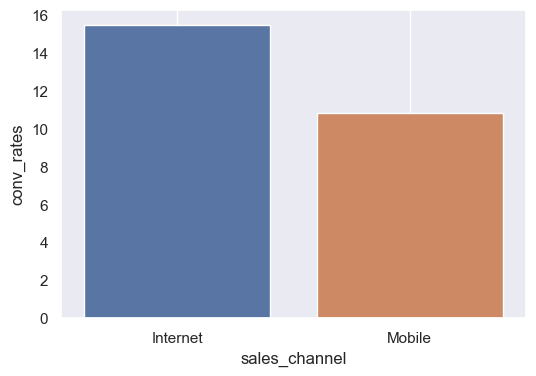

In [11]:
graph_conversion_rates('sales_channel','booking_complete',type='bar')

**Insight**

* There is a slight increase in conversion rate when booking via internet.
* sales_channel_Mobile could be a predictor variable

   num_passengers  conv_rates
0               1   14.209620
1               2   16.018432
2               3   16.695002
3               4   15.414798
4               5   19.429590
5               6   18.685121
6               7   15.789474
7               8   13.483146
8               9   19.696970


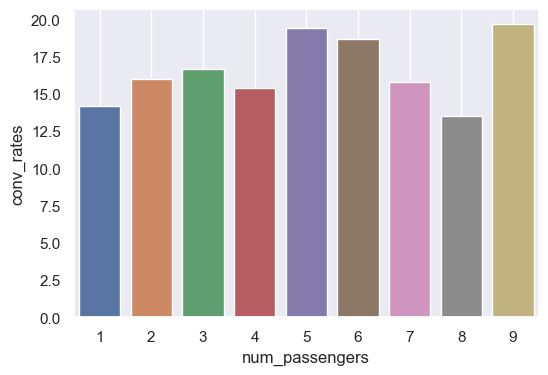

In [12]:
graph_conversion_rates('num_passengers','booking_complete',type='bar')

**Insight**

* No significant differences are observed in the num_passengers column, this appears not to be a predictor variable

   wants_extra_baggage  conv_rates
0                    0   11.502929
1                    1   16.666168


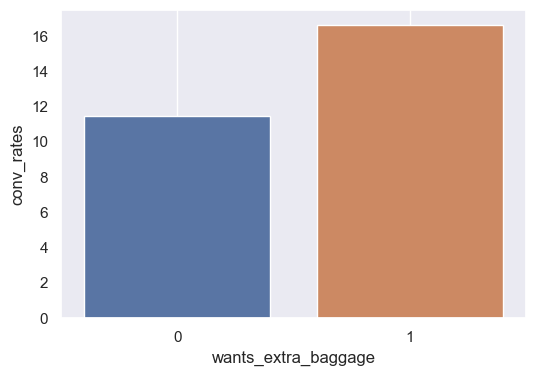

In [13]:
graph_conversion_rates('wants_extra_baggage','booking_complete',type='bar')

   wants_preferred_seat  conv_rates
0                     0   13.794379
1                     1   17.706088


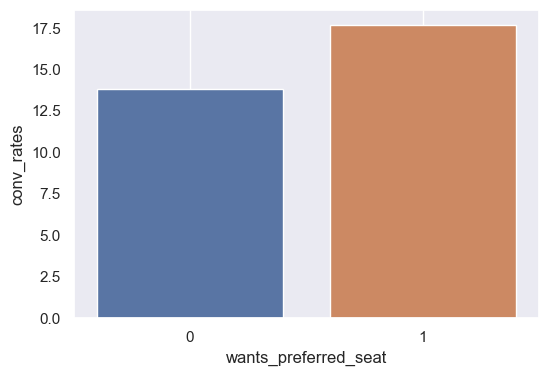

In [14]:
graph_conversion_rates('wants_preferred_seat','booking_complete',type='bar')

   wants_in_flight_meals  conv_rates
0                      0   14.139580
1                      1   16.050943


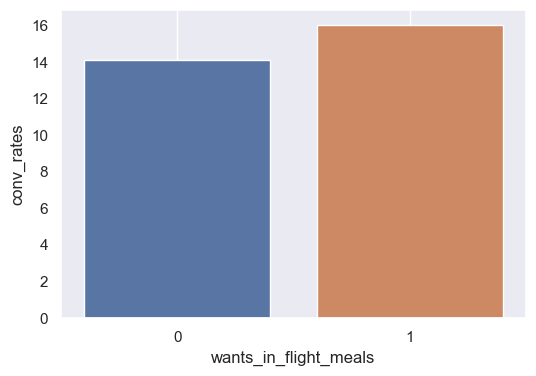

In [15]:
graph_conversion_rates('wants_in_flight_meals','booking_complete',type='bar')

**Insight**

* No significant differences are observed in the last columns, this appears not to be a predictor variable
* the columns wants_in_flight_meals, wants_preferred_seat, wants_extra_baggage have the same conversion rate, for class 1

     purchase_lead  conv_rates
0                0   11.351351
1                1   14.890511
2                2   17.910448
3                3   19.791667
4                4   19.966997
..             ...         ...
465            625    0.000000
466            633    0.000000
467            641  100.000000
468            704    0.000000
469            867  100.000000

[470 rows x 2 columns]


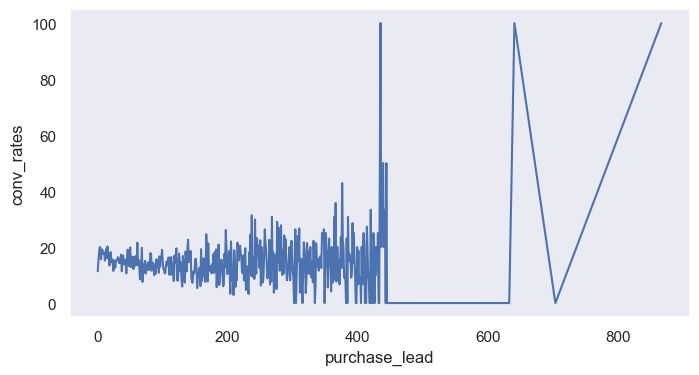

In [16]:
graph_conversion_rates('purchase_lead','booking_complete',type='line')

**Insight**

* After 450 days, outliers are observed

In [17]:
# Dropping the outliers by setting a cap on Age and income. 
df = df[(df["purchase_lead"]<450)]

     purchase_lead  conv_rates
0                0   11.351351
1                1   14.890511
2                2   17.910448
3                3   19.791667
4                4   19.966997
..             ...         ...
440            442   33.333333
441            443    0.000000
442            444   50.000000
443            445    0.000000
444            446    0.000000

[445 rows x 2 columns]


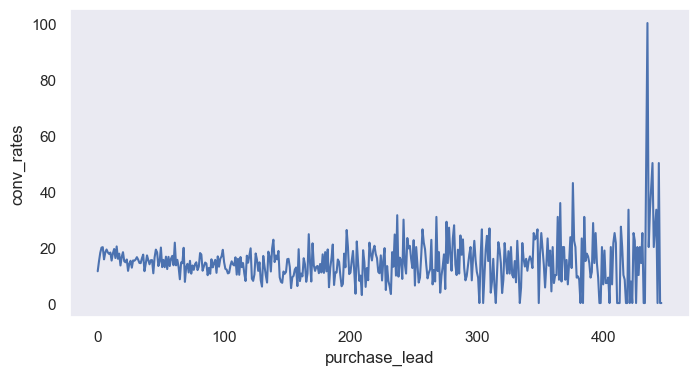

In [18]:
graph_conversion_rates('purchase_lead','booking_complete',type='line')

In [19]:
# Create a new dataset to assess multicollinearity
var_predictors = df.iloc[:,:-1]

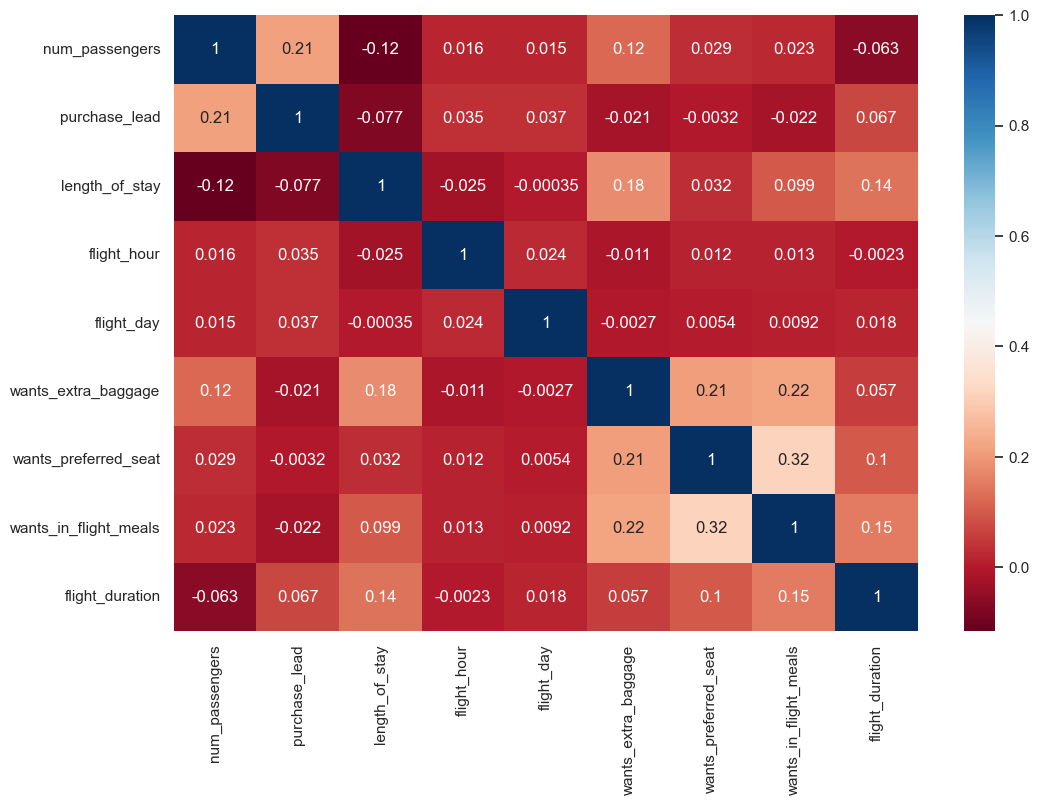

In [20]:
# Create Correlation heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(var_predictors.corr(), cmap='RdBu', annot=True)
plt.show()

**Insight**

* Correlation graph shows that there is no high correlation between variables, which allows us to conclude that there is no multicollinearity

Visualize the distribution of each feature

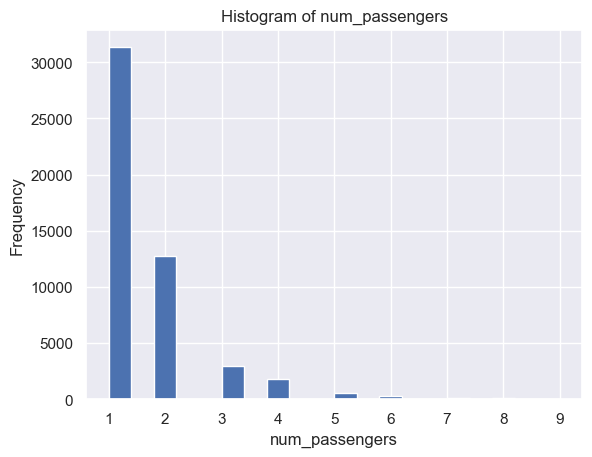

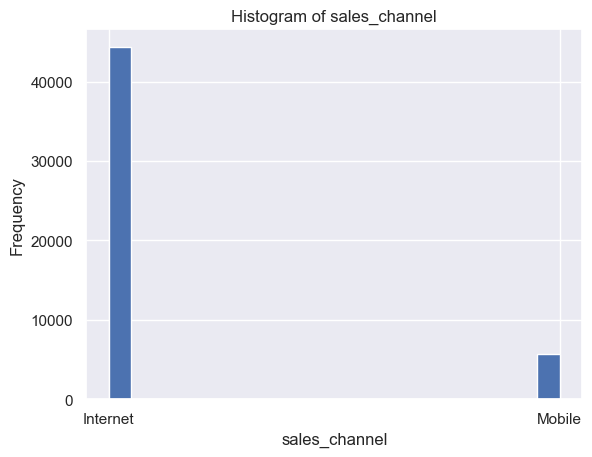

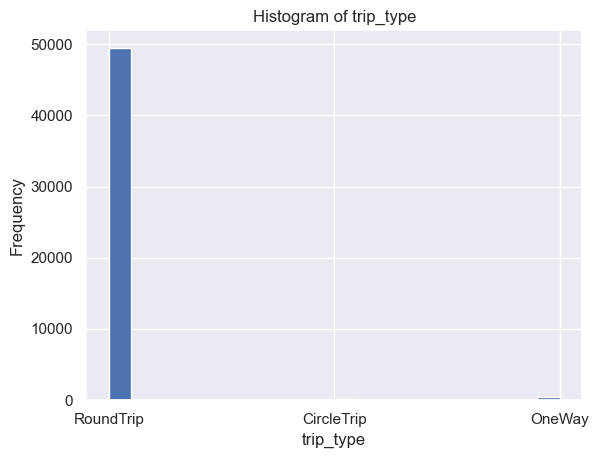

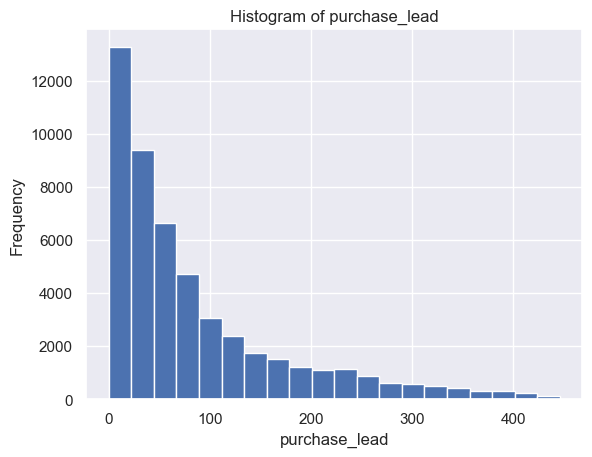

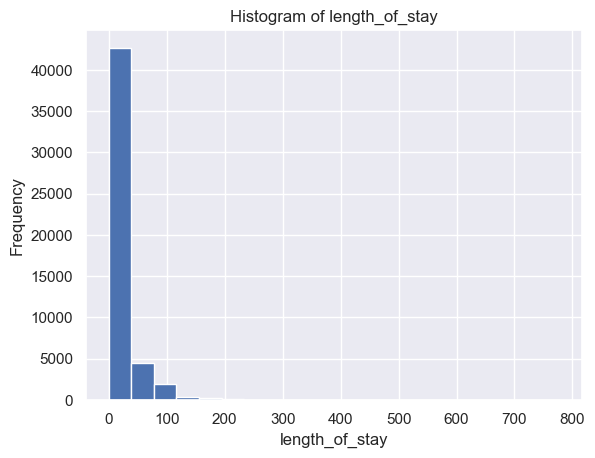

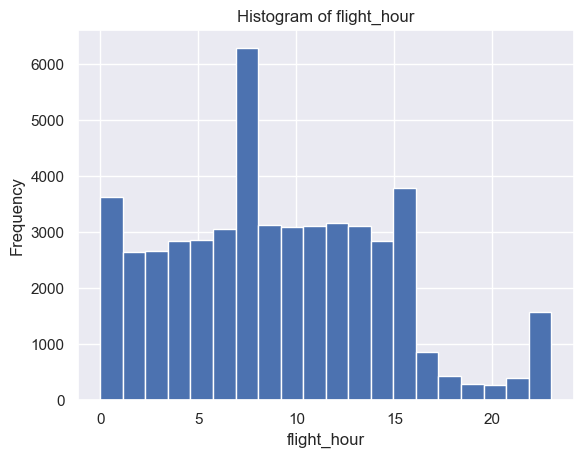

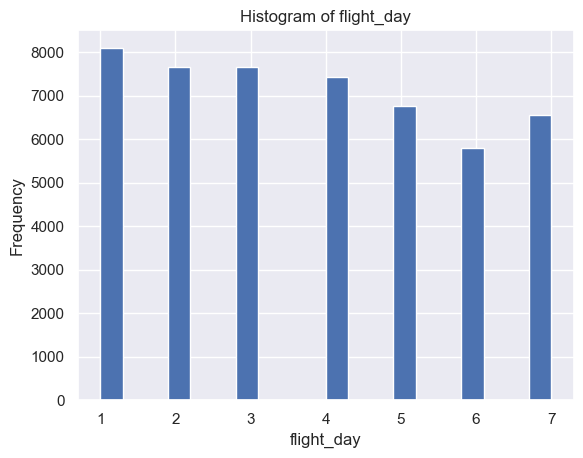

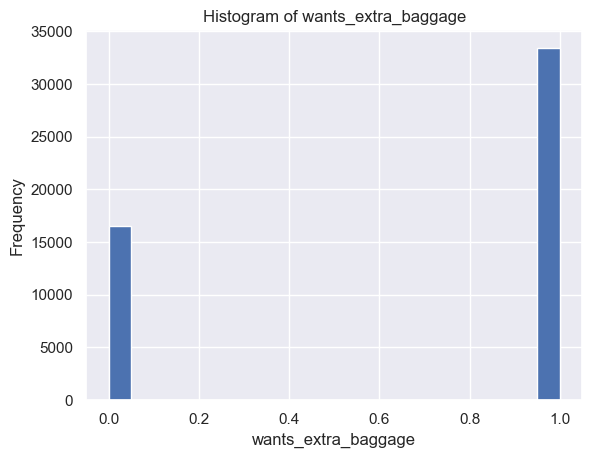

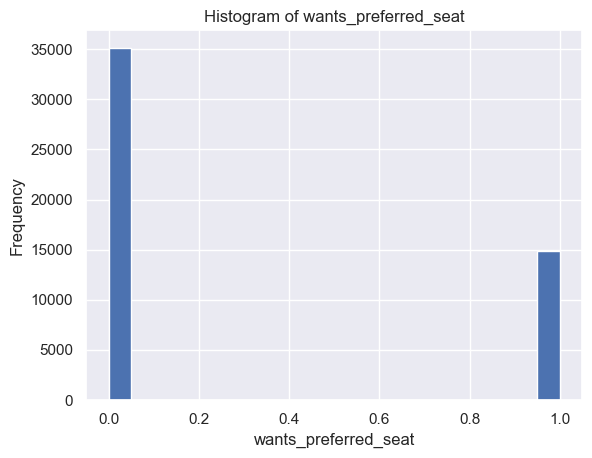

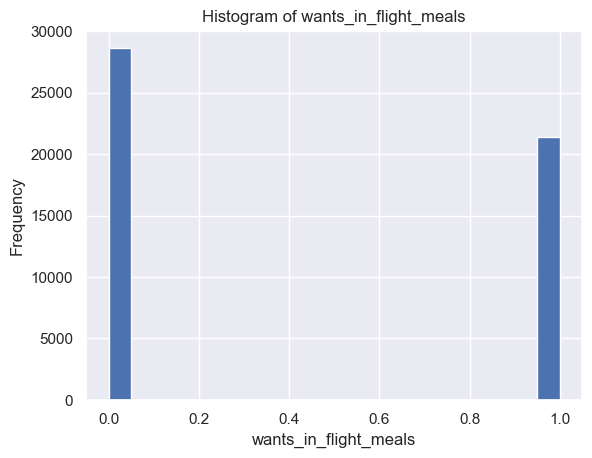

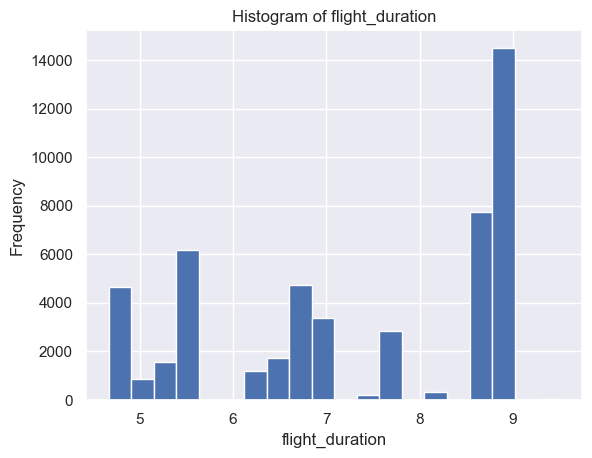

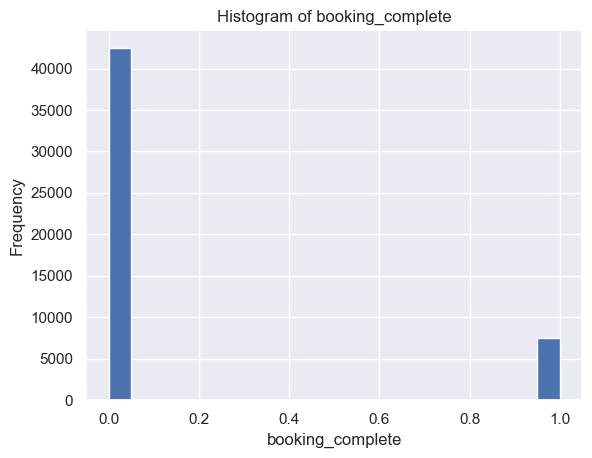

In [21]:
for column in df.columns:
    plt.figure()
    df[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [22]:
# Create a checkpoint
df_cleaned = df.copy()

In [23]:
df_cleaned.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,0,0,0,5.52,0


### **Feature enginnering**

Encoding categorical variables

In [24]:
object_cols = [col for col in df_cleaned.columns if df_cleaned[col].dtype == "object"]

In [25]:
# Get dummies
Dummies_cols = pd.get_dummies(df_cleaned[object_cols], drop_first=True)

# Remove categorical columns (will replace with one-hot encoding)
num_df_cleaned = df_cleaned.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
df_cleaned = pd.concat([num_df_cleaned, Dummies_cols], axis=1)

In [26]:
# Create a checkpoint
df_encoded = df_cleaned.copy()

Scaling Data

In [27]:
df_encode_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete', 'sales_channel_Mobile',
         'trip_type_OneWay', 'trip_type_RoundTrip']

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
# df_scaler = scaler.fit_transform(df_encoded)
df_scaler = scaler.fit_transform(df_encoded)

In [29]:
df_scaled = pd.DataFrame(df_scaler, columns=df_encode_cols)

Balancing vaiables inmbalanced

In [30]:
# Import Library
from imblearn.over_sampling import SMOTE

# Separate target from predictors
X = df_scaled.drop("booking_complete", axis=1)
y = df_scaled['booking_complete']

# Applying SMOTE to predictos variables
smote_X = SMOTE(sampling_strategy="auto", random_state=0)
X_resampled, y_resampled = smote_X.fit_resample(X, y)

# Applying SMOTE variable to predict
smote_y = SMOTE(sampling_strategy="auto", random_state=0)
X_resampled, y_resampled = smote_y.fit_resample(X_resampled, y_resampled)

### **Classifier**

In [33]:
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2, stratify=y_resampled, random_state=0)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create random forest model
model = RandomForestClassifier(n_estimators=400, random_state=0)

# Fit the model
model.fit(X_train, y_train)

# Create predict
predictions = model.predict(X_test)

print("The model's accuaracy is: ", accuracy_score(y_test, predictions))

The model's accuaracy is:  0.9007058823529411


In [36]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X_train, y_train, cv=5).mean())

0.8947616368850652


In [39]:
# Extract the importance of the features from the tuned model.
#Feature Importance
importance = pd.Series(model.feature_importances_,
                       index = X_resampled.columns.values,
                       name = "importance") 
importance

num_passengers           0.090352
purchase_lead            0.172265
length_of_stay           0.248829
flight_hour              0.156929
flight_day               0.085633
wants_extra_baggage      0.016220
wants_preferred_seat     0.014029
wants_in_flight_meals    0.016767
flight_duration          0.185434
sales_channel_Mobile     0.011054
trip_type_OneWay         0.000814
trip_type_RoundTrip      0.001674
Name: importance, dtype: float64

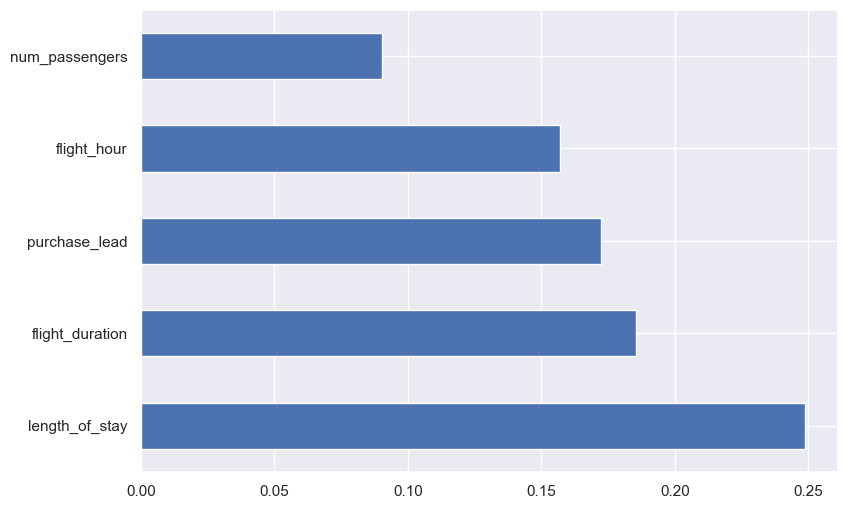

In [41]:
# Plot the top 5 most important drivers using a horizontal bar plot. A quick way is to use the plot function from Pandas.
# Plotting feature Importance
importance.nlargest(5).plot(kind = 'barh',
                            figsize = (9,6))
plt.show()

In [40]:
# Scoring of each driver
scoring = X_resampled.mean().rename("scoring")
scoring

num_passengers           0.074074
purchase_lead            0.181887
length_of_stay           0.027010
flight_hour              0.395543
flight_day               0.465653
wants_extra_baggage      0.700162
wants_preferred_seat     0.319295
wants_in_flight_meals    0.439614
flight_duration          0.507395
sales_channel_Mobile     0.100481
trip_type_OneWay         0.005464
trip_type_RoundTrip      0.993003
Name: scoring, dtype: float64

In [41]:
# Build a dataframe with the drivers' importance and their average score
# Create DataFrame
df_drivers = pd.concat([importance, scoring], axis = 1)
df_drivers

,importance,scoring
num_passengers,0.090352,0.074074
purchase_lead,0.172265,0.181887
length_of_stay,0.248829,0.027010
flight_hour,0.156929,0.395543
flight_day,0.085633,0.465653
wants_extra_baggage,0.016220,0.700162
wants_preferred_seat,0.014029,0.319295
wants_in_flight_meals,0.016767,0.439614
flight_duration,0.185434,0.507395
sales_channel_Mobile,0.011054,0.100481


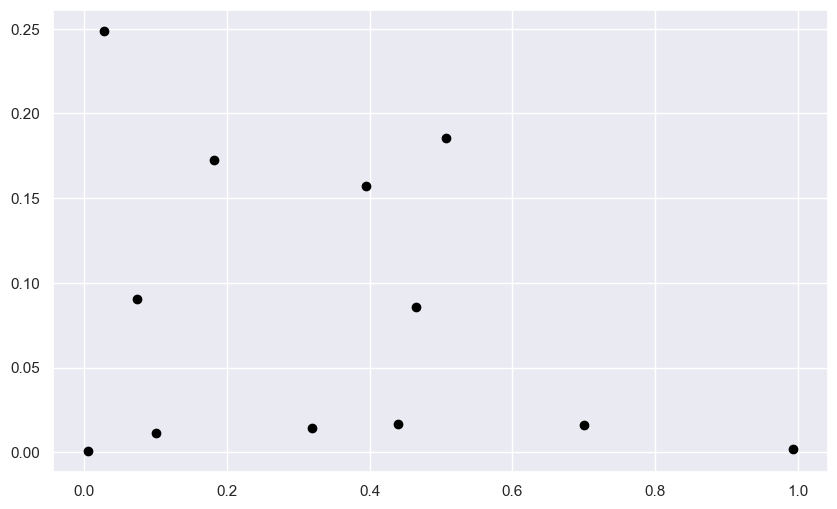

In [42]:
#Set up an initial scatter plot and specify black as the color of the dots.
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 
 
#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")
 
plt.show()

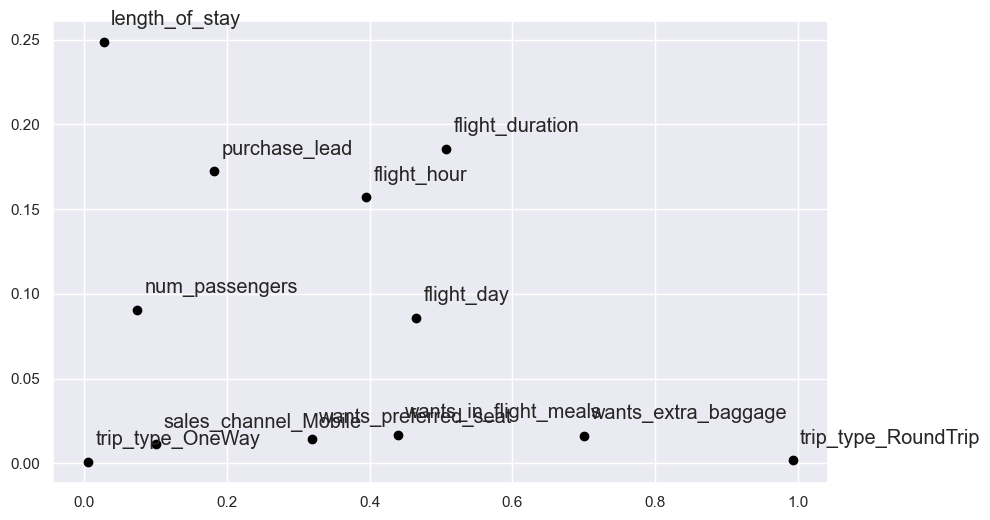

In [43]:
""" Add the name of each of the drivers to the text. 
One way is to use the plt.text function in a loop that uses the x-y coordinates as inputs. 
Including the size as large in the plt.text function makes sure the text is readable. Add '+ 0.01' to not overlap the dots."""
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 
 
#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")
 
#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")
 
plt.show()

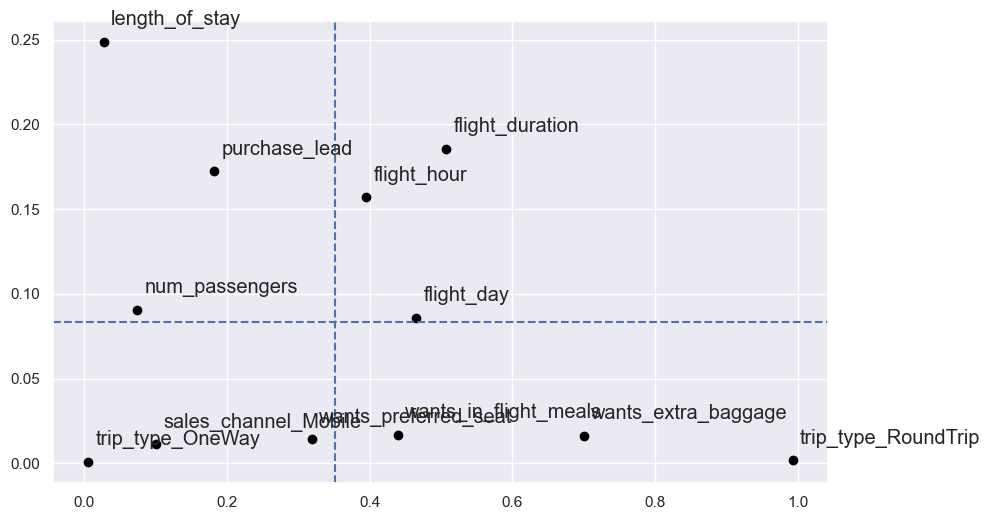

In [44]:
# Apply a vertical line with axvline function and a horizontal line with the axhline function to create a 2 by 2 matrix.
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 
 
#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")
 
#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")
 
#Add vertical and horizontal line
plt.axvline(df_drivers.scoring.mean(), 
            color = "b", 
            linestyle = "dashed")
plt.axhline(df_drivers.importance.mean(), 
            color = "b", 
            linestyle = "dashed")
 
plt.show()

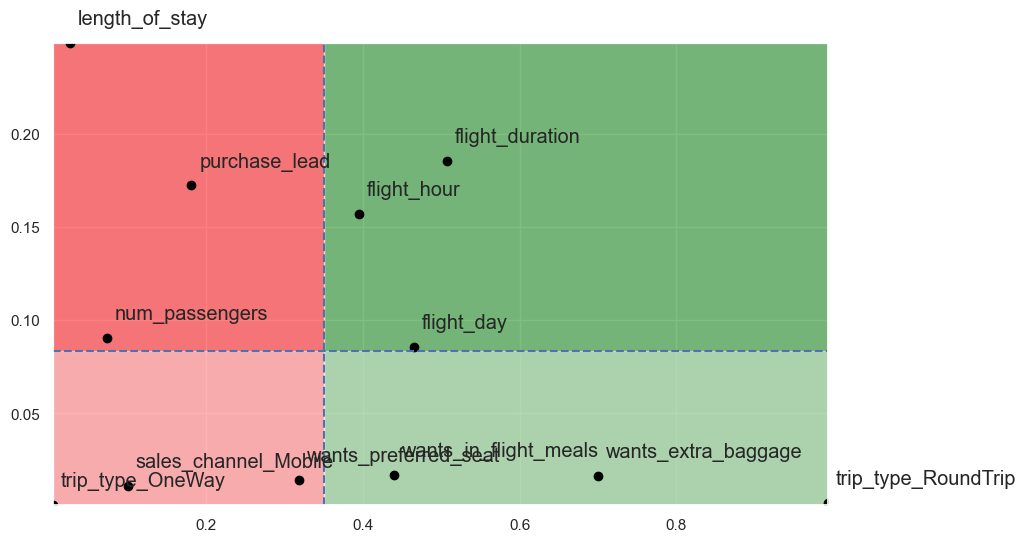

In [45]:
""" Apply a green area right of the vertical line and a red area left of it with the axvspan function. 
Add a white area with the axhspan function and make it hollow by specifying the alpha parameter. 
One example is to set it to 0.4 like the example below. """

#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 
 
# colouring
ax.margins(0)
ax.axvspan(df_drivers.scoring.mean(), 
           df_drivers.scoring.max(), 
           facecolor='green', 
           alpha=0.5)
ax.axvspan(df_drivers.scoring.min(), 
           df_drivers.scoring.mean(), 
           facecolor='red', 
           alpha=0.5)
ax.axhspan(df_drivers.importance.min(), 
           df_drivers.importance.mean(), 
           facecolor='white', 
           alpha=0.4)
 
 
#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")
 
#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")
 
#Add vertical and horizontal line
plt.axvline(df_drivers.scoring.mean(), 
            color = "b", 
            linestyle = "dashed")
plt.axhline(df_drivers.importance.mean(), 
            color = "b", 
            linestyle = "dashed")
 
plt.show()

However, notice that the extremes are now on the edge of the chart and that needs to be addressed.

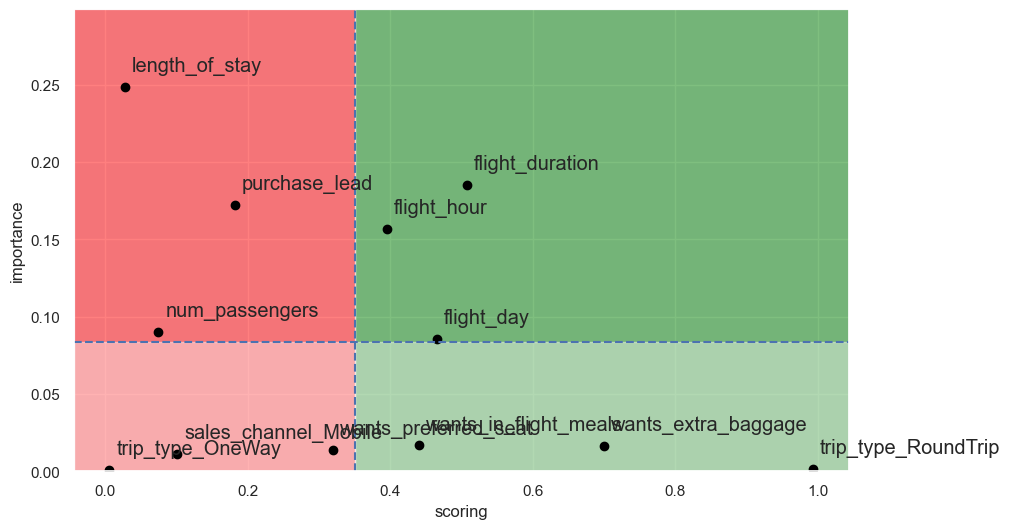

In [48]:
# One possibility to improve the visualization is to increase the areas of the colored spans. Increase the size of the y-axis by using the axhspan with the hollow parameter set to 0.

#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 
 
# colouring
ax.margins(0)
ax.axvspan(df_drivers.scoring.mean(), 
           df_drivers.scoring.max()+0.05, 
           facecolor='green', 
           alpha=0.5)
ax.axvspan(df_drivers.scoring.min()-0.05, 
           df_drivers.scoring.mean(), 
           facecolor='red', 
           alpha=0.5)
ax.axhspan(0, 
           df_drivers.importance.mean(), 
           facecolor='white', 
           alpha=0.4)
ax.axhspan(0, 
           df_drivers.importance.max() + 0.05, 
           facecolor='white', 
           alpha=0)
 
#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")

plt.xlabel('scoring')
plt.ylabel('importance')
 
#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")
 
#Add vertical and horizontal line
plt.axvline(df_drivers.scoring.mean(), 
            color = "b", 
            linestyle = "dashed")
plt.axhline(df_drivers.importance.mean(), 
            color = "b", 
            linestyle = "dashed")
 
plt.show()